In [1]:
import pandas as pd
import numpy as np

#Graphiques
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as gp





#Statistiques
from scipy.stats import chi2_contingency

# Machine Learning
from sklearn.cluster import KMeans
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
input_path = "./01_Input_Data"
output_path = "./2_outputs"

importation des données

In [3]:
path =input_path + '/bank-additional-full.csv'
data_set = pd.read_csv(path,sep=";",decimal=",")

In [4]:
# Vérifier si des valeurs NaN sont présentes
if data_set.isnull().values.any():
    print("Le dataset contient des valeurs NaN.")
else:
    print("Le dataset ne contient pas de valeurs NaN.")

# Pour voir combien de NaN par colonne
print("Nombre de NaN par colonne :")
# print(data_set.isnull().sum())

Le dataset ne contient pas de valeurs NaN.
Nombre de NaN par colonne :


In [5]:
data_set.head()
# data_set.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [6]:
# Synthèse des variables 
# data_set.describe(include="all")

In [7]:
# #Séparation en variables qualitatives ou catégorielles
# variables_na = []
# variables_numeriques = []
# variables_01 = []
# variables_categorielles = []
# for colu in data_set.columns:
#     print(colu)
#     if True in data_set[colu].isna().unique() :
#         variables_na.append(data_set[colu])
#         print("=> Variable avec des NA")
#     else :
#         if str(data_set[colu].dtypes) in ["int32","int64","float64"]:
#             if len(data_set[colu].unique())==2 :
#                 variables_categorielles.append(data_set[colu])
#                 print("=> Variable binaire")
#             else :
#                 variables_numeriques.append(data_set[colu])
#                 print("=> Variable numérique")
#         else :
#             if len(data_set[colu].unique())==2 :
#                 variables_01.append(data_set[colu])
#                 print("=> Variable binaire")
#             else :
#                 variables_categorielles.append(data_set[colu])
#                 print("=> Variable catégorielle")

def classifier_variables(data_set):
    # Initialisation des listes
    variables_na = []
    variables_numeriques = []
    variables_01 = []
    variables_categorielles = []

    # Parcourir les colonnes du dataset
    for colu in data_set.columns:
        # Vérifier si la colonne contient des valeurs NaN
        if data_set[colu].isna().any():
            variables_na.append(colu)
        else:
            # Vérifier si la colonne est de type numérique
            if data_set[colu].dtype in ["int32", "int64", "float32", "float64"]:
                # Vérifier si la colonne est binaire (deux valeurs uniques)
                if len(data_set[colu].unique()) == 2:
                    variables_01.append(colu)
                else:
                    variables_numeriques.append(colu)
            else:
                # Gérer les colonnes non numériques
                if len(data_set[colu].unique()) == 2:
                    variables_01.append(colu)
                else:
                    variables_categorielles.append(colu)

    # Création du dictionnaire des résultats
    resultat = {
        "variables_na": variables_na,
        "variables_numeriques": variables_numeriques,
        "variables_binaires": variables_01,
        "variables_categorielles": variables_categorielles
    }

    return resultat

# Exemple d'utilisation
variables= classifier_variables(data_set)
print(variables)


{'variables_na': [], 'variables_numeriques': ['age', 'duration', 'campaign', 'pdays', 'previous'], 'variables_binaires': ['contact', 'y'], 'variables_categorielles': ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']}


In [8]:
# Compter le nombre de fois où "UNKNOWN" apparaît par colonne
unknown_counts = (data_set == "unknown").sum()

# Afficher uniquement les colonnes où "UNKNOWN" est présent
unknown_counts = unknown_counts[unknown_counts > 0]

print("Nombre de modalités 'UNKNOWN' par colonne :")
print(unknown_counts)


Nombre de modalités 'UNKNOWN' par colonne :
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


In [9]:
# Compter le nombre de fois où "nonexistent" apparaît par colonne
nonexistent_counts = (data_set == "nonexistent").sum()

# Afficher uniquement les colonnes où "nonexistent" est présent
nonexistent_counts = nonexistent_counts[nonexistent_counts > 0]

print("Nombre de modalités 'nonexistent' par colonne :")
print(nonexistent_counts)


Nombre de modalités 'nonexistent' par colonne :
poutcome    35563
dtype: int64


In [10]:
import pandas as pd
import numpy as np

# Remplacer les valeurs "UNKNOWN" par NaN
data_set.replace("unknown", np.nan, inplace=True)

# Calculer le nombre de NaN par variable
nan_count = pd.DataFrame(data_set.isna().sum(), columns=["Nombre_NA"])

# Ajouter le pourcentage de valeurs NaN par rapport au total des lignes
nan_count["Pourcentage"] = (nan_count["Nombre_NA"] / data_set.shape[0]) * 100

# print(nan_count)


In [11]:
# data_set.set_index('y', inplace=True)
# data_set.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
# data_set.plot()
# data_set.plot.box()
# axs = data_set.plot.area(figsize=(20, 20), subplots=True)

import matplotlib.pyplot as plt

def plot_categorical_histograms(data_set, variable_dict):
    """
    Trace un histogramme pour chaque variable catégorielle dans le DataFrame.

    :param data_set: DataFrame contenant les données.
    :param variable_dict: Dictionnaire des variables classées, issu de classifier_variables.
    """
    # Extraire les variables catégorielles du dictionnaire
    variables_categorielles = variable_dict.get("variables_categorielles", [])
    variables_categorielles += variable_dict.get("variables_binaires", [])

    # Vérifier s'il y a des variables catégorielles
    if not variables_categorielles:
        print("Aucune variable catégorielle à tracer.")
        return

    # Tracer un histogramme pour chaque variable catégorielle
    for var in variables_categorielles:
        plt.figure(figsize=(8, 5))
        data_set[var].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribution de la variable '{var}'")
        plt.xlabel(var)
        plt.ylabel("Fréquence")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Exemple d'utilisation
# data_set est votre DataFrame
# resultat est le dictionnaire renvoyé par classifier_variables


# plot_categorical_histograms(data_set, variables)




In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_scatter_sns(data_set, variable_dict, target):
    """
    Trace un graphique pour chaque variable catégorielle dans le DataFrame, utilisant uniquement Seaborn.

    :param data_set: DataFrame contenant les données.
    :param variable_dict: Dictionnaire des variables classées, issu de classifier_variables.
    :param target: Nom de la colonne cible (variable dépendante).
    """
    # Extraire les variables catégorielles et binaires du dictionnaire
    variables_categorielles = variable_dict.get("variables_categorielles", [])

    # Vérifier s'il y a des variables catégorielles ou binaires
    if not variables_categorielles:
        print("Aucune variable catégorielle ou binaire à tracer.")
        return

    # Tracer les graphiques pour chaque variable catégorielle/binaire
    for var in variables_categorielles:
        plt.figure(figsize=(10, 6))
        contingency_table = pd.crosstab(data_set[target], data_set[var])
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
        plt.title(f"Relation entre '{var}' et '{target}'", fontsize=16, fontweight='bold')
        plt.xlabel(var, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()

# Exemple d'utilisation
# data_set est votre DataFrame
# variable_dict est le dictionnaire renvoyé par classifier_variables



# plot_categorical_scatter_sns(data_set, variables, 'y')


traitement du data set

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188,41188,41188,41188,41188
unique,NaN,11,3,7,2,2,2,2,10,5,NaN,NaN,NaN,NaN,3,10,26,26,316,11
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,1.4,93.994,-36.4,4.857,5228.1
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,16234,7763,7763,2868,16234
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,NaN,NaN,NaN,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,NaN,NaN,NaN,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


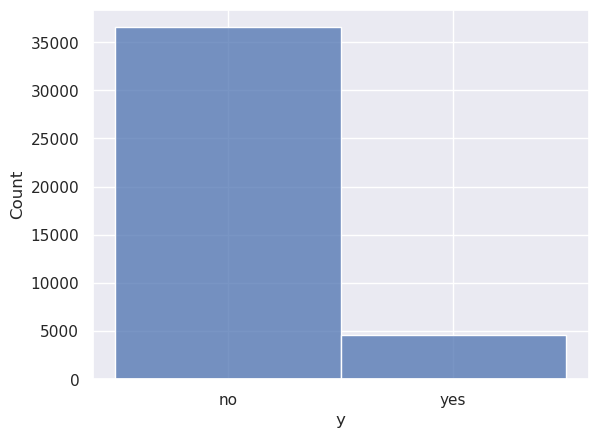

In [27]:
# separation de la cible et des variables explicatives
target=data_set['y']
data_model=data_set.drop(columns=['y'])
# histogramme de la cible
_=sns.histplot(target)
data_model.describe(include='all')

Etude des correlations entre les variables explicatives

In [50]:
def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

import pandas as pd
import numpy as np

def correlation(data, bin=True):
    # Variables classifiées
    variables = classifier_variables(data)
    data_bin = pd.DataFrame()
    
    if bin and 'variables_binaires' in variables:
        data_bin = data[variables['variables_binaires']]
        
    # Test du V de Cramer pour variables catégoriques
    if 'variables_categorielles' in variables:
        data_categorielles = pd.concat([data[variables['variables_categorielles']], data_bin], axis=1)
        if not data_categorielles.empty:
            rows = []
            for var1 in data_categorielles:
                col = []
                for var2 in data_categorielles:
                    cramers = cramers_V(data_categorielles[var1], data_categorielles[var2])  # V de Cramer
                    col.append(round(cramers, 2))  # Arrondi du résultat
                rows.append(col)
            cramers_results = np.array(rows)
            correlation_cat = pd.DataFrame(cramers_results, 
                                           columns=data_categorielles.columns, 
                                           index=data_categorielles.columns)
        else:
            correlation_cat = pd.DataFrame()  # Si aucune variable catégorielle
    else:
        correlation_cat = pd.DataFrame()  # Si aucune variable catégorielle

    # Corrélation de Pearson pour variables numériques
    if 'variables_numeriques' in variables:
        data_numeriques = data[variables['variables_numeriques']]
        if not data_numeriques.empty:
            correlations_num = data_numeriques.corr(method='pearson')
        else:
            correlations_num = pd.DataFrame()  # Si aucune variable numérique
    else:
        correlations_num = pd.DataFrame()  # Si aucune variable numérique

    return correlation_cat, correlations_num


correlation_cat, correlations_num = correlation(data_model)

# correlations_num
# correlation_catego

# Fonction principale pour repérer les variables trop corrélées
def correlation_score(data, seuil):
    correlations_cat, correlations_num = correlation(data)
    
    tab1=[]
    tab2=[]
    
    print("=== Corrélations Catégoriques ===")
    for i in range(correlations_cat.shape[0]):
        for j in range(i + 1, correlations_cat.shape[0]):
            if correlations_cat.iloc[i, j] > seuil:
                print(f"{correlations_cat.index[i]} et {correlations_cat.columns[j]} "
                      f"sont trop dépendantes, V-CRAMER = {correlations_cat.iloc[i, j]:.2f}")
                tab1.append([correlations_cat.index[i],correlations_cat.columns[j],correlations_cat.iloc[i, j]])
    
    print("\n=== Corrélations Numériques ===")
    nb_variables = correlations_num.shape[0]
    for i in range(nb_variables):
        for j in range(i + 1, nb_variables):
            if abs(correlations_num.iloc[i, j]) > seuil:
                print(f"{correlations_num.index[i]} et {correlations_num.columns[j]} "
                      f"sont trop dépendantes, corr = {correlations_num.iloc[i, j]:.2f}")
                tab2.append([correlations_num.index[i],correlations_num.columns[j],correlations_num.iloc[i, j]])
                
    return tab1,tab2
           
# tab1,tab2=correlation_score(data_model, 0.7)

# print(tab1)


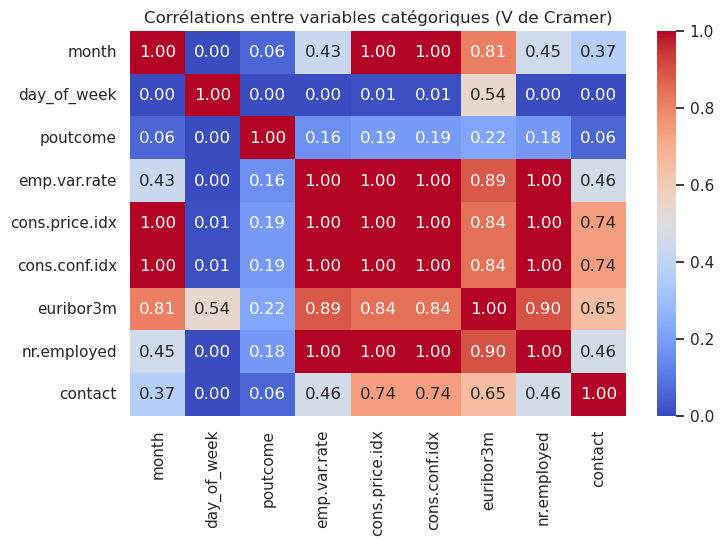

In [15]:

def plot_categorical_correlations(correlation_cat):
    if correlation_cat.empty:
        print("Aucune variable catégorielle à afficher.")
        return
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(correlation_cat, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Corrélations entre variables catégoriques (V de Cramer)")
    plt.show()
    
plot_categorical_correlations(correlation_cat)

In [16]:
# def plot_interactive_heatmap(correlation_matrix, title):
#     fig = px.imshow(correlation_matrix, color_continuous_scale="coolwarm", text_auto=True)
#     fig.update_layout(title=title, width=800, height=600)
#     fig.show()

# plot_interactive_heatmap(correlation_cat, "Corrélations entre variables catégoriques (V de Cramer)")

preprocessing


In [17]:
def encode_categorical_variables(data):
    """
    Effectue le one-hot encoding sur les variables catégoriques d'un dataset.

    Args:
        data (pd.DataFrame): Le DataFrame contenant les données à traiter.
        variables (dict): Dictionnaire contenant les listes de colonnes sous les clés :
                          - 'variables_categorielles' : liste des colonnes catégoriques.
                          - 'variables_binaires' : liste des colonnes binaires.

    Returns:
        pd.DataFrame: Un DataFrame avec les variables catégoriques encodées et les autres colonnes inchangées.
    """
    
    variables= classifier_variables(data)
    # Récupérer les variables catégoriques et binaires
    variables_categorielles = variables.get("variables_categorielles", [])
    variables_binaires = variables.get("variables_binaires", [])

    # Vérifier que les variables catégoriques existent dans le DataFrame
    if not set(variables_categorielles).issubset(data.columns):
        raise ValueError("Certaines variables catégoriques spécifiées n'existent pas dans le DataFrame.")

    # Sélectionner uniquement les colonnes catégoriques
    data_categorielles = data[variables_categorielles]

    # Initialiser l'encodeur
    preproc_ohe = preproc.OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Ajuster et transformer les variables catégoriques
    preproc_ohe.fit(data_categorielles)
    variables_categorielles_ohe = preproc_ohe.transform(data_categorielles)

    # Convertir le résultat en DataFrame
    variables_categorielles_ohe = pd.DataFrame(
        variables_categorielles_ohe,
        columns=preproc_ohe.get_feature_names_out(data_categorielles.columns),
        index=data.index  # Conserver les index originaux
    )

    # Supprimer les colonnes catégoriques d'origine et ajouter les colonnes encodées
    data_final = pd.concat([
        data.drop(columns=variables_categorielles),
        variables_categorielles_ohe
    ], axis=1)

    return data_final

data_model_encoded = encode_categorical_variables(data_model, variables)

data_model_encoded.head()


,age,contact,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191,nr.employed_5195.8,nr.employed_5228.1
0,56,telephone,261,1,999,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,telephone,149,1,999,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,telephone,226,1,999,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,telephone,151,1,999,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,telephone,307,1,999,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:

def encoded_normalized(data):
    """
    Effectue le one-hot encoding sur les variables catégoriques et normalise les variables numériques d'un dataset.

    Args:
        data (pd.DataFrame): Le DataFrame contenant les données à traiter.
        variables (dict): Dictionnaire contenant les listes de colonnes sous les clés :
                          - 'variables_categorielles' : liste des colonnes catégoriques.
                          - 'variables_binaires' : liste des colonnes binaires.
                          - 'variables_numeriques' : liste des colonnes numériques.

    Returns:
        pd.DataFrame: Un DataFrame avec les variables catégoriques encodées, les variables numériques normalisées,
                      et les autres colonnes inchangées.
    """
    # Récupérer les variables catégoriques, binaires et numériques
    variables= classifier_variables(data)
    variables_categorielles = variables.get("variables_categorielles", [])
    variables_binaires = variables.get("variables_binaires", [])
    variables_numeriques = variables.get("variables_numeriques", [])


    # Sélectionner uniquement les colonnes catégoriques
    data_categorielles = data[variables_categorielles+variables_binaires]

    # Initialiser l'encodeur pour les variables catégoriques
    preproc_ohe = preproc.OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Ajuster et transformer les variables catégoriques
    preproc_ohe.fit(data_categorielles)
    variables_categorielles_ohe = preproc_ohe.transform(data_categorielles)

    # Convertir le résultat en DataFrame
    variables_categorielles_ohe = pd.DataFrame(
        variables_categorielles_ohe,
        columns=preproc_ohe.get_feature_names_out(data_categorielles.columns),
        index=data.index  # Conserver les index originaux
    )

    # Normaliser les variables numériques
    if variables_numeriques:
        scaler = preproc.StandardScaler()
        data_numeriques = data[variables_numeriques]
        data_numeriques_normalisees = scaler.fit_transform(data_numeriques)
        data_numeriques_normalisees = pd.DataFrame(
            data_numeriques_normalisees,
            columns=variables_numeriques,
            index=data.index
        )
    else:
        data_numeriques_normalisees = pd.DataFrame(index=data.index)

    # Supprimer les colonnes catégoriques d'origine et ajouter les colonnes encodées
    data_final = pd.concat([
        variables_categorielles_ohe,
        data_numeriques_normalisees
    ], axis=1)

    return data_final

data_preproc = encoded_normalized(data_model)
data_preproc.head()


,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,...,nr.employed_5176.3,nr.employed_5191,nr.employed_5195.8,nr.employed_5228.1,contact_telephone,age,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.533034,0.010471,-0.565922,0.195414,-0.349494
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.628993,-0.421501,-0.565922,0.195414,-0.349494
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-0.290186,-0.124520,-0.565922,0.195414,-0.349494
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-0.002309,-0.413787,-0.565922,0.195414,-0.349494
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.533034,0.187888,-0.565922,0.195414,-0.349494


sampling

In [45]:
X_global = data_preproc                 
Y_global = target.apply(lambda x: 1 if x == 'yes' else 0)


In [46]:
#Réorganisation des données 
X = X_global.to_numpy()
Y = Y_global.to_numpy()

#Sampling en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Fitting

In [47]:
# Initialisation de l'objet
model_CART = DecisionTreeRegressor()  
 
# Train Decision Tree Classifer
model_CART = model_CART.fit(X_train,y_train) 

In [48]:
#Prédiction sur train 
y_pred_train = model_CART.predict(X_train) 

#Métriques 
# 
print("MAE sur train:", metrics.mean_absolute_error(y_train, y_pred_train))
# MSE
print("MSE sur train:", metrics.mean_squared_error(y_train, y_pred_train))
# RMSE
print("RMSE sur train:", metrics.root_mean_squared_error(y_train, y_pred_train)) 

MAE sur train: 0.0
MSE sur train: 0.0
RMSE sur train: 0.0


In [49]:
#Prédiction sur test
y_pred_test = model_CART.predict(X_test) 
#Métriques
# MSE
print("MAE sur test:", metrics.mean_absolute_error(y_test, y_pred_test))
# MSE
print("MSE sur test:", metrics.mean_squared_error(y_test, y_pred_test))
# RMSE
print("RMSE sur test:", metrics.root_mean_squared_error(y_test, y_pred_test)) 

MAE sur test: 0.10924981791697014
MSE sur test: 0.10924981791697014
RMSE sur test: 0.3305296021795478
